In [3]:
import numpy as np
import sys
sys.path.append('../..')
import gillespy2
from gillespy2 import Model, Species, Parameter, Reaction, Event, \
                      EventTrigger, EventAssignment, RateRule, \
                      AssignmentRule, FunctionDefinition
# from gillespy2 import SSACSolver
# from gillespy2 import VariableSSACSolver
# from gillespy2 import TauLeapingSolver
from gillespy2 import TauHybridSolver
# from gillespy2 import ODESolver

# Photosynthesis

$$C0_2 + 2 H_20 + photons \rightarrow CH_2O + 0_2 + H_20$$

https://en.wikipedia.org/wiki/Photosynthesis

cite: Whitmarsh J, Govindjee (1999). "Chapter 2: The Basic Photosynthetic Process". In Singhal GS, Renger G, Sopory SK, Irrgang KD, Govindjee (eds.). Concepts in Photobiology: Photosynthesis and Photomorphogenesis. Boston: Kluwer Academic Publishers. p. 13. ISBN 978-0-7923-5519-9.

In [112]:
class Photosynthesis(Model):
    def __init__(self, parameter_values=None):
        Model.__init__(self, name="Photosynthesis")
        self.volume = 1

        # Parameters
        self.add_parameter(Parameter(name="k1",expression="0.00001"))
        self.add_parameter(Parameter(name="D", expression="0.25"))
        self.add_parameter(Parameter(name="ka",expression="100"))
        self.add_parameter(Parameter(name="kd",expression="1"))

        # Variables
        self.add_species(Species(name="CarbonDioxide", 
                        initial_value=100, mode="continuous"))
        self.add_species(Species(name="Water", 
                        initial_value=100, mode="continuous"))
        self.add_species(Species(name="photons", 
                        initial_value=0, mode="continuous"))
        self.add_species(Species(name="carbohydrate", 
                        initial_value=0, mode="dynamic", switch_min=50))
        self.add_species(Species(name="oxygen", 
                        initial_value=100, mode="continuous"))
        
        # Assignment Rules
        self.add_rate_rule(RateRule(name="sunlight", 
                     formula="5*sin(t/3.14159)", variable="photons"))
        

        # Reactions
        self.add_reaction(Reaction(name="Photosynthesis", 
             reactants={'CarbonDioxide': 1, 'Water': 2}, 
             products={'carbohydrate': 1, 'oxygen': 1, 'Water': 1}, 
             propensity_function="CarbonDioxide*2*Water*photons*k1"))
        
        self.add_reaction(Reaction(name="WaterDiffusionIn", 
            reactants={}, 
            products={'Water': 1}, 
            propensity_function="D*ka"))
        self.add_reaction(Reaction(name="WaterDiffusionOut", 
            reactants={'Water': 1}, 
            products={}, 
            propensity_function="D*kd*Water"))
        self.add_reaction(Reaction(name="CarbonDioxideDiffusionIn", 
            reactants={}, 
            products={'CarbonDioxide': 1}, 
            propensity_function="D*ka"))
        self.add_reaction(Reaction(name="CarbonDioxideDiffusionOut", 
            reactants={'CarbonDioxide': 1}, 
            products={}, 
            propensity_function="D*kd*CarbonDioxide"))
        self.add_reaction(Reaction(name="oxygenDiffusionIn", 
            reactants={}, 
            products={'oxygen': 1}, 
            propensity_function="D*ka"))
        self.add_reaction(Reaction(name="oxygenDiffusionOut", 
            reactants={'oxygen': 1}, 
            products={}, 
            propensity_function="D*kd*oxygen"))

        

        # Timespan
        self.timespan(np.arange(0, 40, 0.05))

In [113]:
model = Photosynthesis()

In [114]:
#print(model)

# Simulation Parameters

In [115]:
def configure_simulation():
    kwargs = {
        "solver":TauHybridSolver,
        "number_of_trajectories":1,
        # "seed":None,
        # "tau_tol":0.03,
        # "integrator_options":{'rtol': 0.001, 'atol': 1e-06},
    }
    return kwargs

In [118]:
kwargs = configure_simulation()
%time results = model.run(**kwargs)

CPU times: user 1.18 s, sys: 3.86 ms, total: 1.19 s
Wall time: 1.19 s


# Visualization

In [119]:
results.plotplotly()

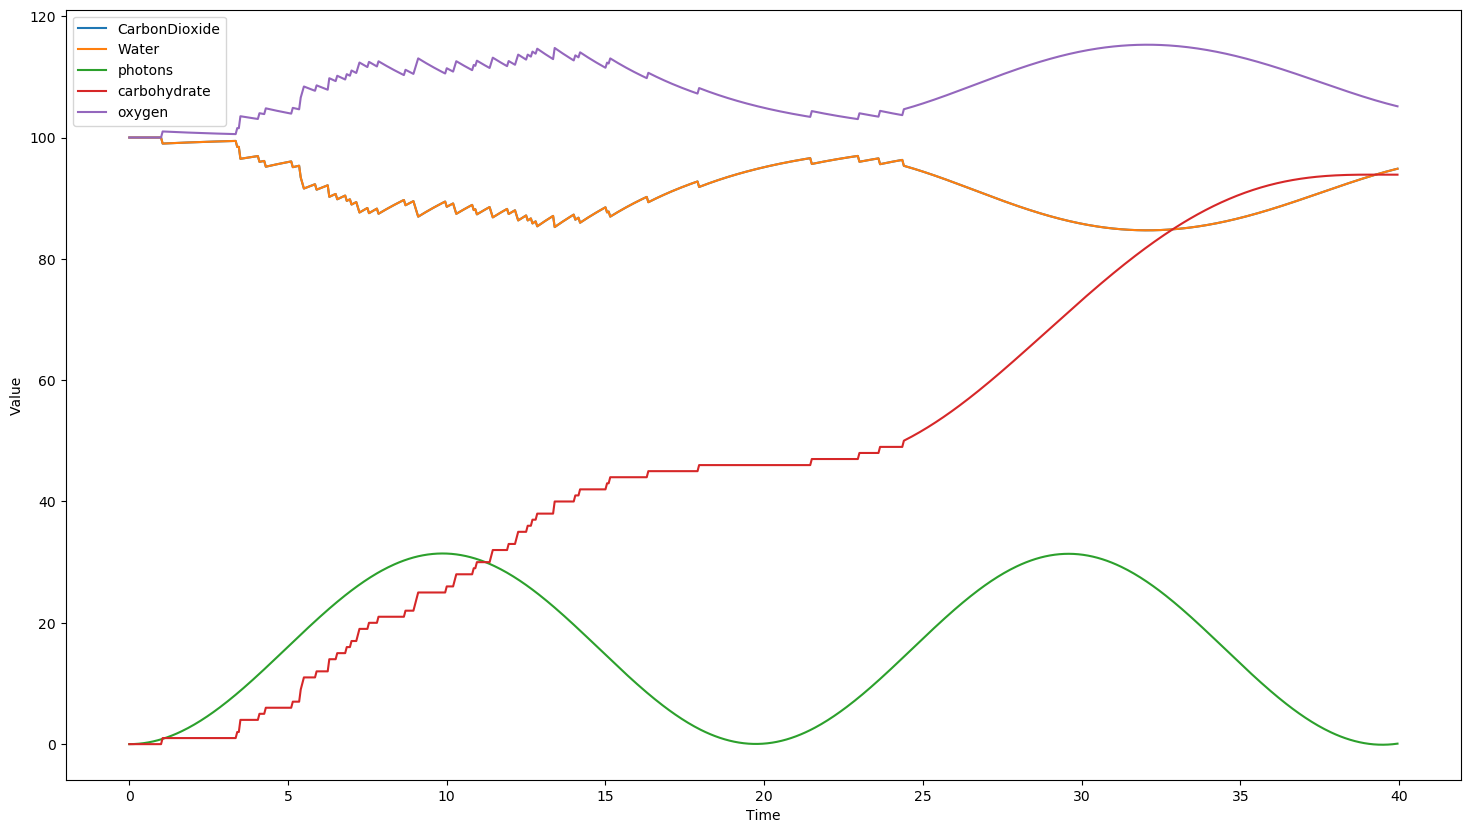

In [120]:
results.plot()